# Exercise 2:
#### Student Name: Einav Diar

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy.stats as st
import statistics
import scipy.stats as stats
from scipy.stats import binom
import statsmodels.stats.power as snp

In [5]:
data= pd.read_csv("https://raw.githubusercontent.com/ShaiYona/Statiscs_2022A/main/SevereIllness.csv")

## Question 1:

In [6]:
data.tail()

,date,age_group,Vaccinated_Severe_Illness_Per_100K,OutDated_Vaccinated_Severe_Illness_Per_100K,Non_Vaccinated_Severe_Illness_Per_100K
85,06-11-2021,all population,0.4,1.0,4.8
86,06-11-2021,under age 60,0.1,0.6,2.7
87,07-11-2021,above age 60,1.4,3.8,50.3
88,07-11-2021,under age 60,0.1,0.6,2.6
89,07-11-2021,all population,0.4,1.0,4.5


## Question 2:

In [7]:
new= data[(data['age_group'] == 'under age 60')]

In [8]:
new.tail()

,date,age_group,Vaccinated_Severe_Illness_Per_100K,OutDated_Vaccinated_Severe_Illness_Per_100K,Non_Vaccinated_Severe_Illness_Per_100K
76,03-11-2021,under age 60,0.1,0.4,2.9
80,04-11-2021,under age 60,0.1,0.4,2.7
82,05-11-2021,under age 60,0.1,0.5,2.7
86,06-11-2021,under age 60,0.1,0.6,2.7
88,07-11-2021,under age 60,0.1,0.6,2.6


## Question 3:

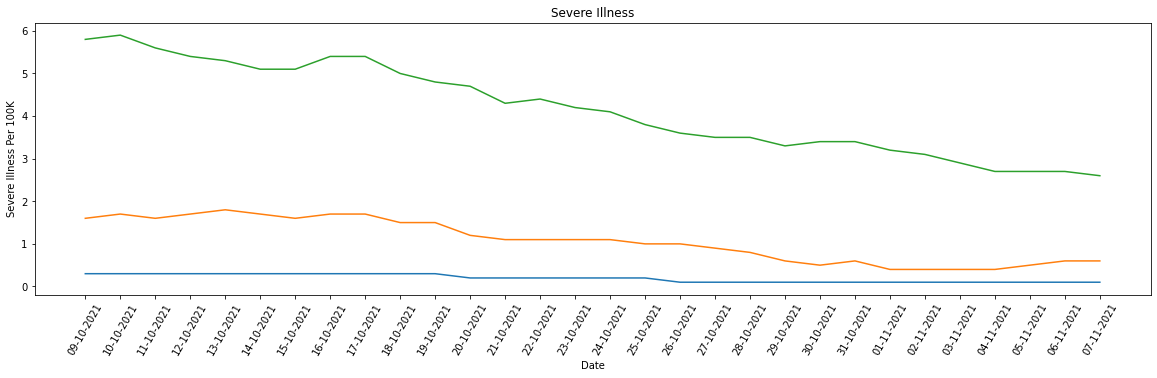

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(new.date, new.Vaccinated_Severe_Illness_Per_100K)
ax.plot(new.date, new.OutDated_Vaccinated_Severe_Illness_Per_100K)
ax.plot(new.date, new.Non_Vaccinated_Severe_Illness_Per_100K)
plt.title('Severe Illness')
plt.xlabel('Date')
plt.ylabel('Severe Illness Per 100K')
plt.xticks(rotation=60,fontsize=10)
plt.show()

## Question 4:

 מכוון שהתבקשנו לבצע מבחן להשוואת השונויות בין האוכלוסיות השונות, נבחר לבצע את מבחן F.

In [10]:
def f_test(x,y):
    x=np.array(x)
    y=np.array(y)
    f=np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn=x.size-1
    dfd=y.size-1
    p=1-stats.f.cdf(f,dfn,dfd)
    return f,p
a=new[['Non_Vaccinated_Severe_Illness_Per_100K']]
b=new[['Vaccinated_Severe_Illness_Per_100K']]
f_test(a,b)

(136.71648044692742, 1.1102230246251565e-16)

stats= 136.71648044692742


p_value=1.1102230246251565e-16

## Question 5:

1.

In [11]:
power_analysis= snp.TTestIndPower()
sample_size1= power_analysis.solve_power(effect_size=0.5, power= 0.99, alpha=0.01)
sample_size1

193.91868488817084

2.

In [12]:
power_analysis= snp.TTestIndPower()
sample_size2= power_analysis.solve_power(effect_size=2, power= 0.99, alpha=0.01)
sample_size2

13.80533443515486

מכוון שמדובר בבני אדם, גודל המדגם הנדרש הוא 14 אנשים.
ניתן לראות שככל שהגדלנו את הפרש התוחלות חלקי סטיית התקן, אנו צריכים מדגם קטן יותר מכוון שיש ביניהם קשר הפוך.
כלומר, אפקט סייז מצביע על הקשר בין המשתנים, ככל שהוא גבוה יותר - נדרשים פחות אנשים.

3.

In [13]:
a=np.array(new[['Non_Vaccinated_Severe_Illness_Per_100K']])
b=np.array(new[['Vaccinated_Severe_Illness_Per_100K']])
s=(np.mean(a)-np.mean(b))/ np.sqrt((np.std(a,ddof=1)**2 + np.std(b,ddof=1)**2)/2)
print('The effect size is:', s)

The effect size is: 5.273702930509043


4.

In [14]:
power_analysis= snp.TTestIndPower()
sample_size3= power_analysis.solve_power(effect_size=s, power= 0.99, alpha=0.01)
sample_size3

3.803498804723388

ולכן גודל המדגם המינימלי הוא 4 

## Question 6:

1.

if pvalue <= alpha: reject H0


if pvalue > alpha: do not reject H0

ולכן, נדחה את השערת האפס אם קיים קשר בין שתי האוכלוסיות.

2.

In [15]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
X_st, pVal, dof, execpted = chi2_contingency([new['Non_Vaccinated_Severe_Illness_Per_100K'], new['Vaccinated_Severe_Illness_Per_100K']])
print('dof=%d' % dof)
print('expectation table = ', execpted)
alpha=0.01
prob=1-alpha
X_c= chi2.ppf(prob,dof)
print('significance=%.3f, critical=%.3f, stat=%.3f' % (alpha, X_c, X_st))

dof=29
expectation table =  [[5.82930375 5.92486611 5.63817904 5.44705432 5.35149197 5.16036725
  5.16036725 5.44705432 5.44705432 5.0648049  4.87368018 4.68255547
  4.30030604 4.3958684  4.20474369 4.10918133 3.82249426 3.53580719
  3.44024484 3.44024484 3.24912012 3.34468248 3.34468248 3.15355777
  3.05799541 2.8668707  2.67574598 2.67574598 2.67574598 2.58018363]
 [0.27069625 0.27513389 0.26182096 0.25294568 0.24850803 0.23963275
  0.23963275 0.25294568 0.25294568 0.2351951  0.22631982 0.21744453
  0.19969396 0.2041316  0.19525631 0.19081867 0.17750574 0.16419281
  0.15975516 0.15975516 0.15087988 0.15531752 0.15531752 0.14644223
  0.14200459 0.1331293  0.12425402 0.12425402 0.12425402 0.11981637]]
significance=0.010, critical=49.588, stat=0.318


In [16]:
print(pVal)

1.0


pValue = 1

dof=29

xSt= 0.318


3.

In [17]:
stats.chi2.ppf(1-alpha, dof)

49.58788447289881

critical= 49.588

4.

In [18]:
if abs(X_st) >= X_c:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


## Question 7:

In [19]:
last=new[(new['date'] == '07-11-2021')]

In [20]:
last[['Non_Vaccinated_Severe_Illness_Per_100K']]

,Non_Vaccinated_Severe_Illness_Per_100K
88,2.6


כלומר 2.6 חולים קשה ל100 אלף איש

In [21]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint 

In [22]:
proportion_confint(count=2.6, nobs=100000, alpha=(1 - 0.99))

(0.0, 6.75334595761597e-05)